## Overview

This dataset contains data on Airbnb locations in New York City. It details all sorts of interesting information like the name of the posting, what neighborhood it's in, price, reviews per month, and bunch of other stuff.

So let's get into it!

### Data Overview

Let's see what the data looks like

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# read in data
data = pd.read_csv("/Users/danielluo/data/new-york-city-airbnb-open-data/AB_NYC_2019.csv")
# dropping attributes that I think might not be super interesting for analysis

In [23]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [24]:
data.describe(include = 'all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


In [25]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [26]:
data.shape

(48895, 16)

Looks like each row is a different property in NYC. It spreads among five boroughs of NYC like Manhattan, Brooklyn, Queens and then it's broken into neighborhoods within that. It also has latitude and longitude.

Each location has characteristics like price, minimum nights, number of reviews, date of last review, reviews per month, host listings, and availability.

There are a total of 48,895 different postings in NYC

## Processing Data

### Dealing with Missing Data
Let's see what missing data we have, and see if there are trends with NA data

In [27]:
data.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Reviews per month has a lot of NAs. These are likely postings that have no reviews so far. This accounts for a quarter of them so you may need to deal with them separately.

Some of them also have no name, which I'll deal with when I look into the titles of the postings. Otherwise, the data is pretty clean, not much missing data which is nice.

### Data that Doesn't Make Sense

Interestingly there are some properties that require 365 nights, meaning booking for a whole year. The highest is 1250, which is like 3.42 years.

There are some properties that also cost $10,000 which is insane, but I guess it's New York...

In [54]:
data.sort_values('price')[-10:]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
43009,33397385,Midtown Manhattan great location (Gramacy park),16105313,Debra,Manhattan,Midtown,40.74482,-73.98367,Entire home/apt,5100,30,1,2019-06-22,1.00,2,343
3720,2243699,"SuperBowl Penthouse Loft 3,000 sqft",1483320,Omri,Manhattan,Little Italy,40.71895,-73.99793,Entire home/apt,5250,1,0,NaN,NaN,1,0
15560,12520066,Luxury townhouse Greenwich Village,66240032,Linda,Manhattan,Greenwich Village,40.73046,-73.99562,Entire home/apt,6000,1,0,NaN,NaN,1,0
3537,2110145,UWS 1BR w/backyard + block from CP,2151325,Jay And Liz,Manhattan,Upper West Side,40.77782,-73.97848,Entire home/apt,6000,14,17,2015-02-17,0.27,1,359
29664,22780103,Park Avenue Mansion by (Hidden by Airbnb),156158778,Sally,Manhattan,Upper East Side,40.78517,-73.95270,Entire home/apt,6419,1,0,NaN,NaN,12,45
3774,2271504,SUPER BOWL Brooklyn Duplex Apt!!,11598359,Jonathan,Brooklyn,Clinton Hill,40.68766,-73.96439,Entire home/apt,6500,1,0,NaN,NaN,1,0
48043,36056808,Luxury TriBeCa Apartment at an amazing price,271248669,Jenny,Manhattan,Tribeca,40.71206,-74.00999,Entire home/apt,6500,180,0,NaN,NaN,1,365
37194,29547314,Apartment New York \nHell’s Kitchens,35303743,Patricia,Manhattan,Upper West Side,40.76835,-73.98367,Private room,6500,30,0,NaN,NaN,1,97
44034,33998396,3000 sq ft daylight photo studio,3750764,Kevin,Manhattan,Chelsea,40.75060,-74.00388,Entire home/apt,6800,1,0,NaN,NaN,6,364
45666,34895693,Gem of east Flatbush,262534951,Sandra,Brooklyn,East Flatbush,40.65724,-73.92450,Private room,7500,1,8,2019-07-07,6.15,2,179


### High Level Goals and Product Strategy

So what kind of insights can be drawn from this data that would be useful?

Airbnb operates by taking a cut of from both the booker and the host. They take typically 6-12% of what's paid by the booker and 3% from the host for every booking that is completed. The majority of Airbnb's revenue comes from this. **This simply means that growth comes from more people booking stays on the platform and that the more expensive a stay is, the more money Airbnb can make.**

### Overview of Ideas

Since Airbnb's revenue comes from 1) # of bookings and 2) price of bookings I would want to look into what trends exist with these metrics. Are there certain types of properties that are more profitable? Are there certain types of properties that are more popular? Can we find which properties are "underrated" or "overpriced"? 

Knowing this type of information can potentially created targetted messages towards hosts that can help them improve the success of their property, maybe suggesting higher prices if they're "underrated" or by suggesting more amenities if they're "overpriced".

### Metrics of Interest

I'll look at the price variable to measure price (unsurprisingly) and I'll look at number of reviews, and reviews_per_month to gauge popularity.

#### Correlations

In [36]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1,0.58829,-0.00312529,0.0909085,0.0106187,-0.0132245,-0.31976,0.291828,0.133272,0.0854676
host_id,0.58829,1,0.0202242,0.127055,0.0153091,-0.0173643,-0.140106,0.296417,0.15495,0.203492
latitude,-0.00312529,0.0202242,1,0.0847884,0.0339387,0.0248693,-0.0153888,-0.0101416,0.0195174,-0.0109835
longitude,0.0909085,0.127055,0.0847884,1,-0.150019,-0.0627471,0.0590943,0.145948,-0.114713,0.0827307
price,0.0106187,0.0153091,0.0339387,-0.150019,1,0.0427993,-0.0479542,-0.0306083,0.0574717,0.0818288
minimum_nights,-0.0132245,-0.0173643,0.0248693,-0.0627471,0.0427993,1,-0.0801161,-0.121702,0.12796,0.144303
number_of_reviews,-0.31976,-0.140106,-0.0153888,0.0590943,-0.0479542,-0.0801161,1,0.549868,-0.0723761,0.172028
reviews_per_month,0.291828,0.296417,-0.0101416,0.145948,-0.0306083,-0.121702,0.549868,1,-0.00942116,0.185791
calculated_host_listings_count,0.133272,0.15495,0.0195174,-0.114713,0.0574717,0.12796,-0.0723761,-0.00942116,1,0.225701
availability_365,0.0854676,0.203492,-0.0109835,0.0827307,0.0818288,0.144303,0.172028,0.185791,0.225701,1


As we can see there is a fairly weak correlation between price and all other variables. The highest correlation coefficient is availability_365 at 0.08, which likely isn't significant.

There is also only fairly weak correlations between reviews and all other variables. Again, availability 365 has a coefficient of 0.17, which is higher but not signficant still. There is also a fairly strong relationship between reviews per month and number of reviews, which is unsurprising. 

Correlations only tend to indicate linear relationships so there aren't many strong linear relationships with price/popularity with other variables.

### Price Visualizations

Let's visualize some of the relationships between these variables

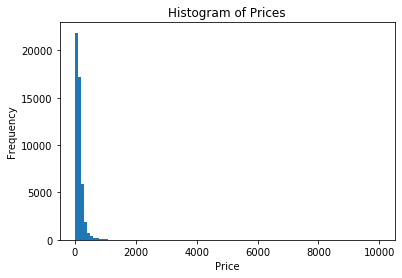

In [76]:
plt.hist(data['price'], bins=100)
plt.title('Histogram of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

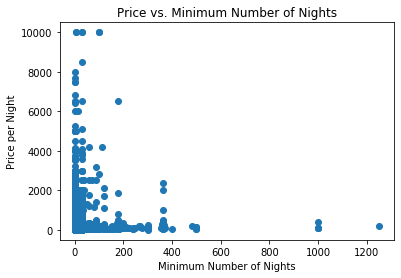

In [68]:
plt.scatter(data['minimum_nights'],data['price'])
plt.title('Price vs. Minimum Number of Nights')
plt.ylabel("Price per Night")
plt.xlabel("Minimum Number of Nights")
plt.show()

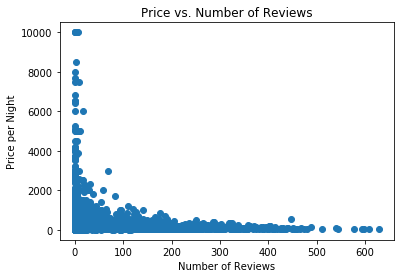

In [69]:
plt.scatter(data['number_of_reviews'], data['price'])
plt.title('Price vs. Number of Reviews')
plt.ylabel("Price per Night")
plt.xlabel("Number of Reviews")
plt.show()

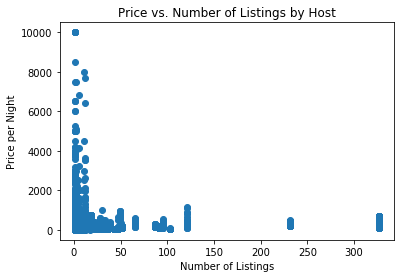

In [70]:
plt.scatter(data['calculated_host_listings_count'], data['price'])
plt.title('Price vs. Number of Listings by Host')
plt.ylabel("Price per Night")
plt.xlabel("Number of Listings")
plt.show()

Why are there these horizontal lines? I think these are probably the same host that has a ton of listings, meaning the number_of_listings variables is the same for all these properties.

In [71]:
data.sort_values('calculated_host_listings_count')[-5:]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
41466,32240873,Sonder | Stock Exchange | Classic Studio + Lounge,219517861,Sonder (NYC),Manhattan,Financial District,40.70796,-74.01206,Entire home/apt,196,2,9,2019-06-18,2.48,327,318
41467,32240896,Sonder | Stock Exchange | Premier 2BR + Sofa Bed,219517861,Sonder (NYC),Manhattan,Financial District,40.70751,-74.01066,Entire home/apt,380,2,12,2019-06-20,3.50,327,302
41468,32240933,Sonder | Stock Exchange | Lively 1BR + Kitchen,219517861,Sonder (NYC),Manhattan,Financial District,40.70726,-74.01060,Entire home/apt,229,2,2,2019-06-23,0.77,327,351
41470,32240970,Sonder | Stock Exchange | Dashing 1BR + Kitchen,219517861,Sonder (NYC),Manhattan,Financial District,40.70584,-74.01039,Entire home/apt,215,2,3,2019-06-13,0.77,327,317
41445,32239640,Sonder | Stock Exchange | Tasteful 3BR + Kitchen,219517861,Sonder (NYC),Manhattan,Financial District,40.70632,-74.01160,Entire home/apt,468,2,11,2019-06-21,3.00,327,267


As expected, these are all the same host so my theory is confirmed.

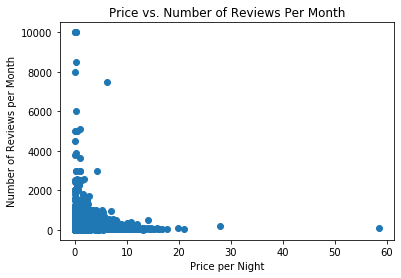

In [74]:
plt.scatter(data['reviews_per_month'], data['price'])
plt.title('Price vs. Number of Reviews Per Month')
plt.xlabel("Price per Night")
plt.ylabel("Number of Reviews per Month")
plt.show()

In essence, we can see that the prices are right skewed, meaning the large majority are on the cheaper end and then very few are very expensive. Also, the ones that are more popular with more reviews are also typically cheaper. This makes sense, cheaper listings tend to get more traffic.

In [77]:
data.groupby('neighbourhood_group').mean()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,,
Bronx,2.273492e+07,1.056099e+08,40.848305,-73.884552,87.496792,4.560953,26.004583,1.837831,2.233731,165.758937
Brooklyn,1.825685e+07,5.671526e+07,40.685036,-73.951190,124.383207,6.056556,24.202845,1.283212,2.284371,100.232292
Manhattan,1.877494e+07,6.783062e+07,40.765062,-73.974607,196.875814,8.579151,20.985596,1.272131,12.791330,111.979410
Queens,2.175500e+07,9.615680e+07,40.731531,-73.872775,99.517649,5.181433,27.700318,1.941200,4.060184,144.451818
Staten Island,2.159747e+07,9.853360e+07,40.610225,-74.105805,114.812332,4.831099,30.941019,1.872580,2.319035,199.678284


In [87]:
data.groupby('neighbourhood_group').count()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,,,,,,,
Bronx,1091,1090,1091,1090,1091,1091,1091,1091,1091,1091,1091,876,876,1091,1091
Brooklyn,20104,20098,20104,20095,20104,20104,20104,20104,20104,20104,20104,16447,16447,20104,20104
Manhattan,21661,21652,21661,21652,21661,21661,21661,21661,21661,21661,21661,16632,16632,21661,21661
Queens,5666,5666,5666,5664,5666,5666,5666,5666,5666,5666,5666,4574,4574,5666,5666
Staten Island,373,373,373,373,373,373,373,373,373,373,373,314,314,373,373


Manhattan is the most expensive by a decently large margin, but also the least number of reviews. Potentially many listings in Manhattan don't get stayed in.

In [82]:
import seaborn as sns

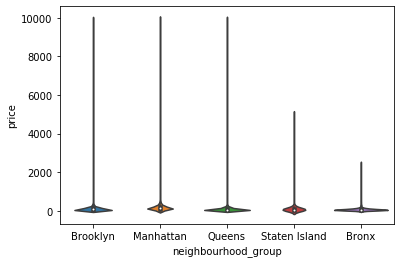

In [83]:
sns.violinplot(x="neighbourhood_group", y="price", data=data)

# this is not helpful because of huge outliers

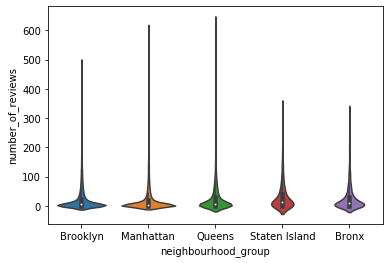

In [88]:
sns.violinplot(x="neighbourhood_group", y="number_of_reviews", data=data)

What do we know right now?

1. Postings in Manhattan are more expensive
2. The majority of postings are split between Brooklyn and Manhattan
3. Manhattan also has the most postings with no reviews --> too many hosts with too few bookers OR there are few locations that are extremely popular that get all the customers